# Laptop Price Prediction:

### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

## Loading Dataset:

##### I found data from kaggle
link:https://www.kaggle.com/datasets/arnabchaki/laptop-price-prediction

In [3]:
df= pd.read_csv("laptop_data.csv", )

In [4]:


df= pd.read_csv("laptop_data.csv", )
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## BASIC UNDERSTANDING OF DATASET

### 1. Checking the Dimensions of Dataset.

In [5]:
print("Total Number of records/ rows present in the dataset is: ", df.shape[0])
print("Total Number of columns present in the dataset is: ", df.shape[1])

Total Number of records/ rows present in the dataset is:  1303
Total Number of columns present in the dataset is:  12


### 2. Fetching the attributes Name

In [6]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

### 3. Generating Basic Information of the data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
# Dataset contains 977 rows and 13 columns.
# 1 column are of float datatype and 12 column are of object datatype.

### 4. Checking Duplicate rows

In [9]:
df.duplicated().sum()

0

In [10]:
# There are no duplicate values present in our dataset

### 5. Checking for null values:

In [11]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [12]:
# there are no null value present in our datasest.

## DATA CLEANING:

In [13]:
# dropping unnamed column

In [14]:
df.drop("Unnamed: 0", axis=1, inplace =True)

In [15]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [16]:
# Ram and weight are actually numerical column. so we are going to remove GB and kg word from column and convert datatype of 
# ram to integer and weight to float

In [17]:
df["Ram"]=df["Ram"].str.replace("GB", "").astype("int")

In [18]:
df["Weight"]=df["Weight"].str.replace("kg", "").astype("float")

In [19]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [20]:
df["Touchscreen"]= df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [21]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [22]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0


In [23]:
new= df["ScreenResolution"].str.split("x", n=1 , expand =True)

In [24]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [25]:
df["x_res"]=new[0]
df["y_res"]=new[1]

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [27]:
df["x_res"] =df["x_res"].str.replace(',' , " ").str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])

In [28]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [29]:
df["x_res"]=df["x_res"].astype("int")

In [30]:
df["y_res"]=df["y_res"].astype("int")

In [31]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [32]:
df["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

In [33]:
df["ppi"]=((df["x_res"]**2)+ (df["y_res"]**2))**0.5/df["Inches"].astype("float")

In [34]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670


In [35]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [36]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [37]:
df["Cpu Name"]=df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [38]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,Cpu Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204,Intel Celeron Dual
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670,Intel Core i7


In [39]:
def fetch_processor(text):
    if text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core i3":
        return text
    else:
        if text[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [40]:
df["cpu Brand"]=df["Cpu Name"].apply(fetch_processor)

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,Cpu Name,cpu Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

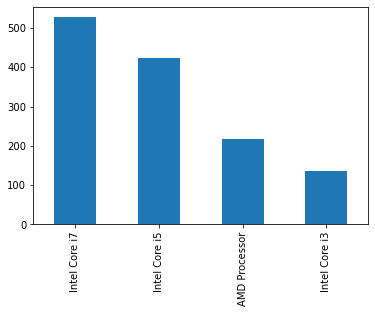

In [42]:
df["cpu Brand"].value_counts().plot(kind="bar")

In [43]:
df.drop(["Inches", "ScreenResolution" , "Cpu", "x_res", "y_res", "Cpu Name"], axis=1, inplace =True)

In [44]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,AMD Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


In [45]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [46]:
# to remove decimal places from numbers
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [47]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')


In [48]:
df["Memory"].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [49]:
# split data  and creating new dataframe
new = df["Memory"].str.split("+", n = 1, expand = True)

In [50]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [51]:
new[1].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: 1, dtype: int64

In [52]:
new[0].value_counts()

256 SSD              412
1000 HDD             224
500 HDD              132
512 SSD              118
128 SSD               96
256 SSD               88
128 SSD               76
32 Flash Storage      38
512 SSD               20
2000 HDD              16
64 Flash Storage      15
1000 SSD              14
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
1000 SSD               2
512 Flash Storage      2
64 SSD                 1
64 Flash Storage       1
1000 HDD               1
32 HDD                 1
128 HDD                1
240 SSD                1
8 SSD                  1
508 Hybrid             1
Name: 0, dtype: int64

In [53]:
df["first"]= new[0]

In [54]:
df["second"]=new[1]

In [55]:
df["first"]= df["first"].str.strip()

In [56]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD,None
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD,None
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,AMD Processor,64 Flash Storage,None
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD,None


In [57]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [58]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD,None,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD,None,0,1,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,AMD Processor,64 Flash Storage,None,0,0,0,1
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD,None,1,0,0,0


In [59]:
# replacing non-digit charactor with blank means column contains numbers only
df['first'] = df['first'].str.replace(r'\D', '')

In [60]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,None,0,1,0,0


In [61]:
df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [62]:
df['second'] = df['second'].str.replace(r'\D', '')

In [63]:
df["second"].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [64]:
# convertng both coluns into integer
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)


In [65]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])

In [66]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,0,0,1,0,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,0,0,1,0,0,0,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,0,0,0,0,1,0,0,0,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,0,1,0,0,0,0,0,0,0,1000


In [67]:
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [68]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [69]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,AMD Processor,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [70]:
df.drop(columns=['Memory'],inplace=True)

In [71]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [72]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [73]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [74]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [75]:
df["Gpu Brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [76]:
df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [77]:
df=df[df["Gpu Brand"]!="ARM"]

In [78]:
df.drop(["Gpu"], axis=1 , inplace=True)

In [79]:
df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

In [80]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [81]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [82]:
df["OpSys"]=df["OpSys"].apply(cat_os)

In [83]:
df["OpSys"].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: OpSys, dtype: int64

## Final Dataset

In [84]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# Exploratory Data Analysis

In [85]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'cpu Brand', 'HDD', 'SSD', 'Gpu Brand'],
      dtype='object')

In [86]:
def cat_col(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(df[col])
    plt.title(f"Distribution of {col}", fontweight='bold', loc='center')
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.barplot(df[col], df["Price"])
    plt.title(f"Distribution of {col} by Price", fontweight='bold', loc='center')
    plt.xticks(rotation=90)
            

In [87]:
def num_col(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f"Distribution of {col}", fontweight='bold', loc='center')
   
    plt.subplot(1,2,2)
    sns.scatterplot(df[col], df["Price"])
    plt.title(f"Relationship between {col} by Price", fontweight='bold', loc='center')
    plt.xticks(rotation=90)
            

### 1. Distribution of Target column(Price)

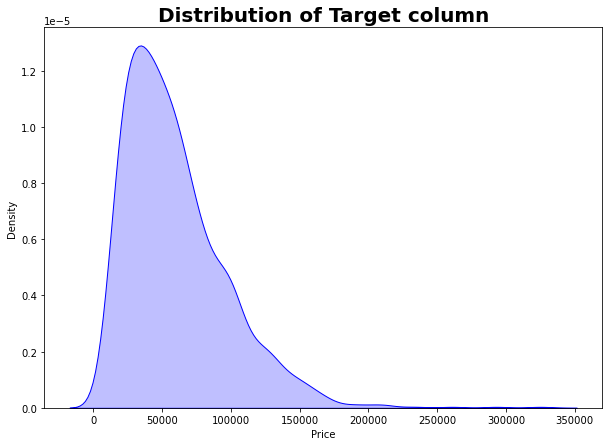

In [88]:
plt.figure(figsize=(10,7))
sns.kdeplot(df["Price"], shade =True , color = "b")
plt.title("Distribution of Target column",fontsize=20, fontweight='bold', loc='center')
plt.show()

In [89]:
# target column is right skwed

### 2.How does the price vary with different categorical features like 'Company', 'TypeName', 'Gpu Brand', and 'OpSys'? Visualize price distributions for each category.

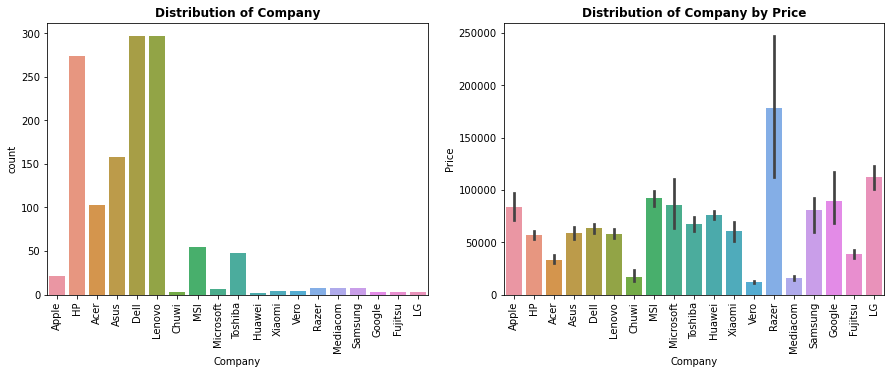

In [90]:
cat_col("Company")

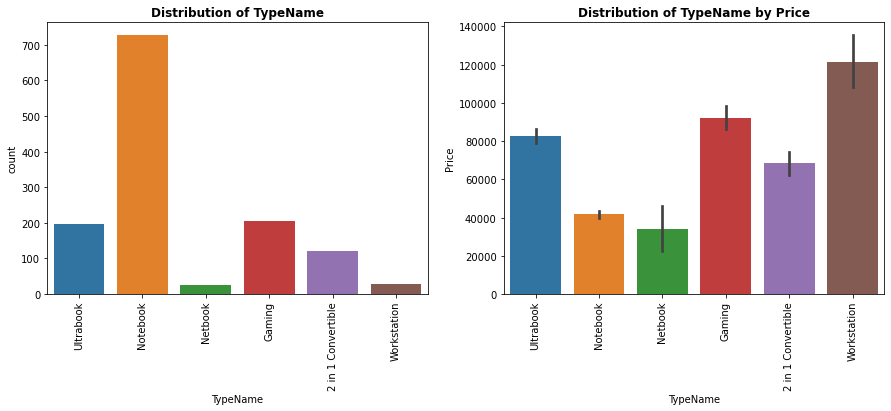

In [91]:
cat_col("TypeName")

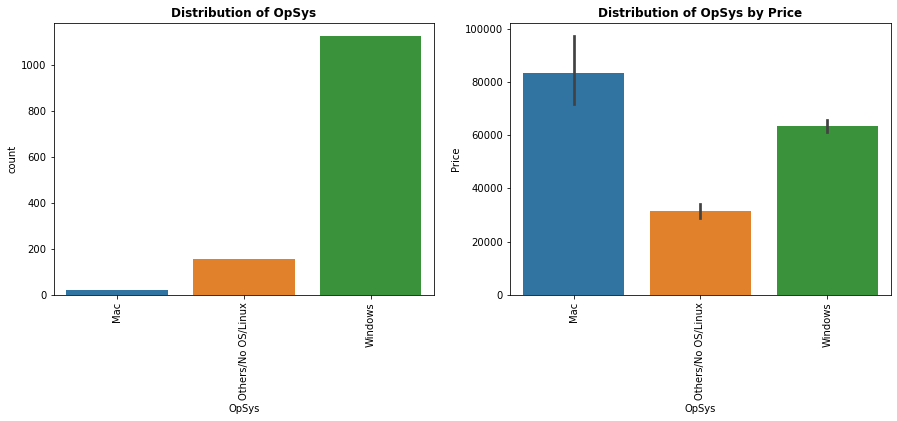

In [92]:
cat_col("OpSys")

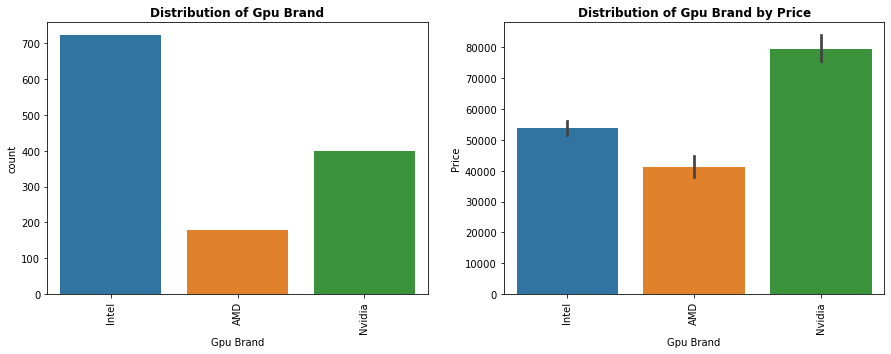

In [93]:
cat_col("Gpu Brand")

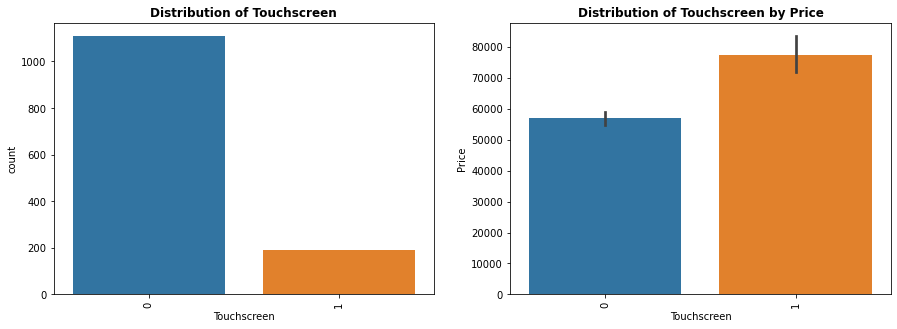

In [94]:
cat_col("Touchscreen")

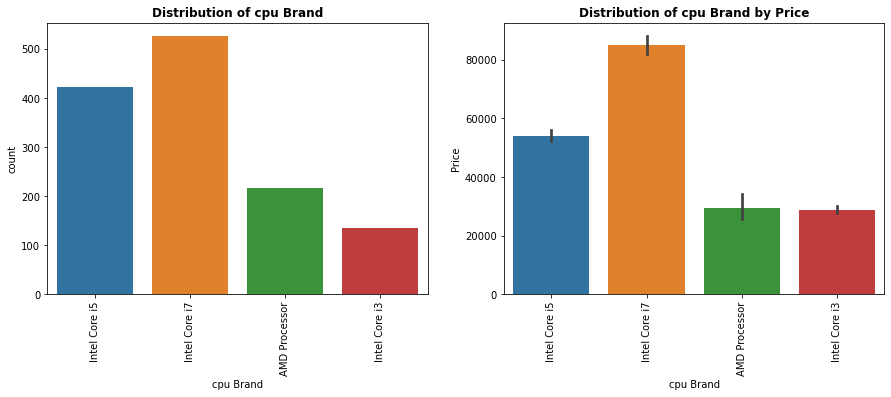

In [95]:
cat_col("cpu Brand")

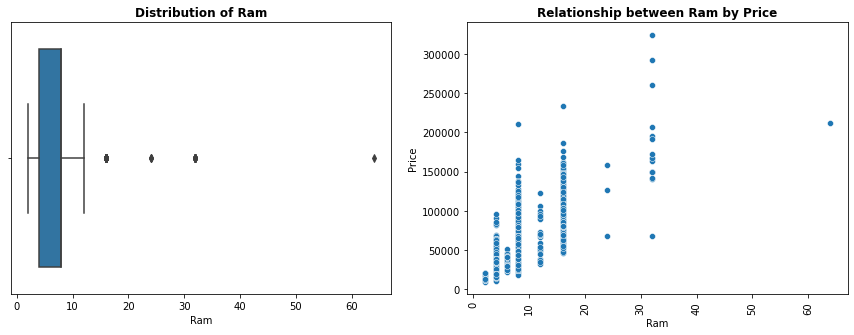

In [96]:
num_col("Ram")

In [97]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'cpu Brand', 'HDD', 'SSD', 'Gpu Brand'],
      dtype='object')

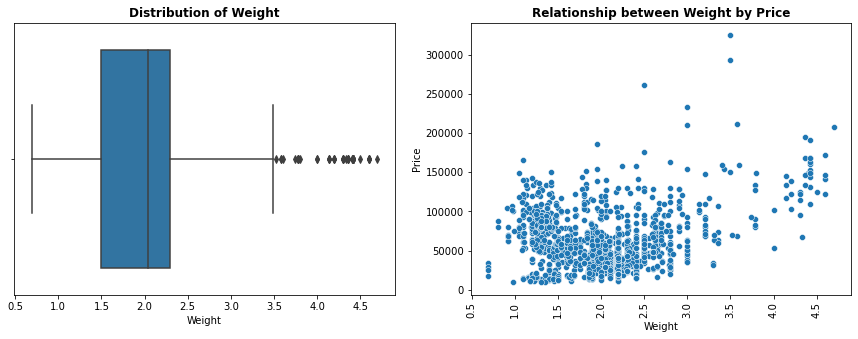

In [98]:
num_col("Weight")

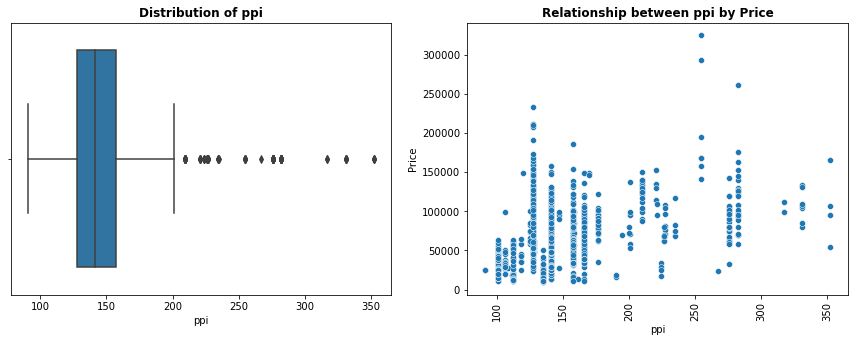

In [99]:
num_col("ppi")

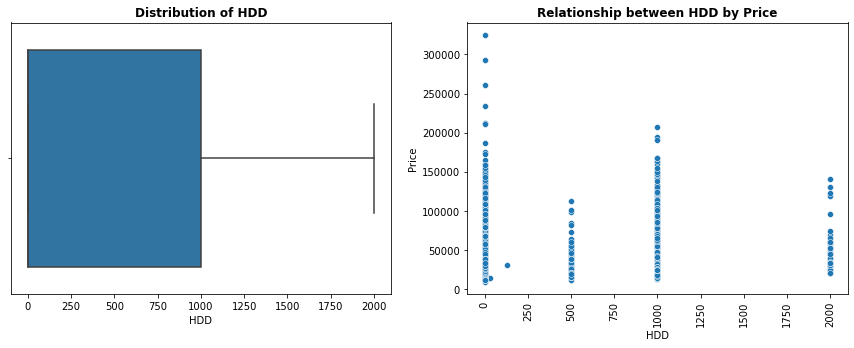

In [100]:
num_col("HDD")

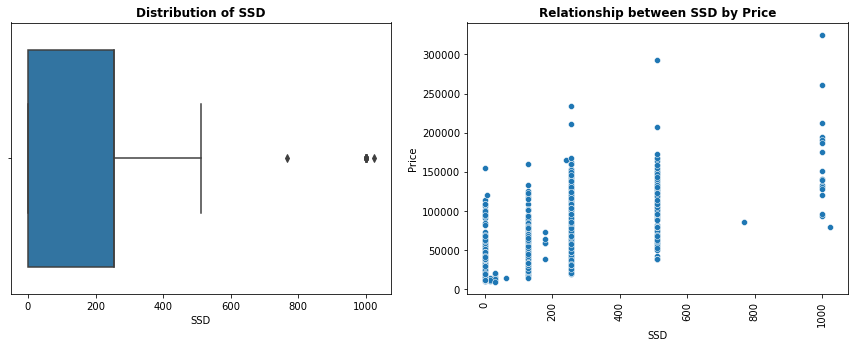

In [101]:
num_col("SSD")

<AxesSubplot:>

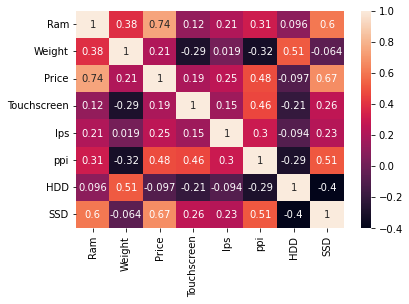

In [102]:
sns.heatmap(df.corr() ,annot=True)

In [103]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'cpu Brand', 'HDD', 'SSD', 'Gpu Brand'],
      dtype='object')

In [160]:
x = df.drop("Price", axis= True)
x

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,AMD Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD


In [161]:
y= np.log(df["Price"])

In [162]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [163]:
ct= ColumnTransformer([("oencoder", OrdinalEncoder(),["Company" , "TypeName", "OpSys", "cpu Brand", "Gpu Brand"])], remainder="passthrough")

In [164]:
x= ct.fit_transform(x)

In [165]:
len(x[0])

12

In [110]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x, y, random_state= 123, test_size= 0.20)

In [111]:

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain1= sc.fit_transform(xtrain)
xtest1= sc.transform(xtest)

In [112]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [113]:
lr=LinearRegression()
knn= KNeighborsRegressor()
dt= DecisionTreeRegressor()
rf= RandomForestRegressor()
svm= SVR()
gb= GradientBoostingRegressor()
ab= AdaBoostRegressor()
xg = XGBRegressor()

In [114]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [115]:

r2_train=[]
r2_test= []
rmse= []
def model_build(model):
    model.fit(xtrain, ytrain)
    ytrain_pred = model.predict(xtrain)
    ytest_pred= model.predict(xtest)
    a= r2_score(ytrain, ytrain_pred)
    r2_train.append(a)
    b= r2_score(ytest, ytest_pred)
    r2_test.append(b)
    rms= round(np.sqrt((mean_squared_error(ytest, ytest_pred))),2)
    rmse.append(rms)
    print(model)
    print("Training Accuracy", a)
    print("Testing Accuracy", b)   
    print("RMSE", rms)
def smodel_build(model):
    model.fit(xtrain1, ytrain)
    ytrain_pred = model.predict(xtrain1)
    ytest_pred= model.predict(xtest1)
    a= r2_score(ytrain, ytrain_pred)
    r2_train.append(a)
    b= r2_score(ytest, ytest_pred)
    r2_test.append(b)
    rms= round(np.sqrt((mean_squared_error(ytest, ytest_pred))),2)
    rmse.append(rms)
    print(model)
    print("Training Accuracy", a)
    print("Testing Accuracy", b)   
    print("RMSE", rms)

In [116]:
smodel_build(lr)

LinearRegression()
Training Accuracy 0.7385011100877347
Testing Accuracy 0.7766440988867049
RMSE 0.31


In [117]:
smodel_build(knn)

KNeighborsRegressor()
Training Accuracy 0.8898153033410456
Testing Accuracy 0.821303420786707
RMSE 0.28


In [118]:
model_build(dt)

DecisionTreeRegressor()
Training Accuracy 0.9955070330436292
Testing Accuracy 0.8083252783485437
RMSE 0.29


In [119]:

model_build(rf)

RandomForestRegressor()
Training Accuracy 0.9797087911338976
Testing Accuracy 0.8862927644710645
RMSE 0.22


In [120]:
smodel_build(svm)

SVR()
Training Accuracy 0.9224006046708262
Testing Accuracy 0.8544247155580905
RMSE 0.25


In [121]:
model_build(gb)

GradientBoostingRegressor()
Training Accuracy 0.9138282602014712
Testing Accuracy 0.8878045327142451
RMSE 0.22


In [122]:


model_build(ab)

AdaBoostRegressor()
Training Accuracy 0.8240168149569731
Testing Accuracy 0.8313404013808494
RMSE 0.27


In [123]:
model_build(xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training Accuracy 0.9881917719381013
Testing Accuracy 0.8898002281959272
RMSE 0.22


In [124]:
score= pd.DataFrame({"Algorithms":[ "LinearRegression","KNeighborsRegressor","DecisionTreeRegressor", 
                                   "RandomForestRegressor","SVR", "GradientBoostingRegressor","AdaBoostRegressor", "XGBRegressor" ],
                   "Training Score":r2_train,
                   "Testing Score":r2_test,
                  "RMSE": rmse})

In [125]:
score

,Algorithms,Training Score,Testing Score,RMSE
0,LinearRegression,0.738501,0.776644,0.31
1,KNeighborsRegressor,0.889815,0.821303,0.28
2,DecisionTreeRegressor,0.995507,0.808325,0.29
3,RandomForestRegressor,0.979709,0.886293,0.22
4,SVR,0.922401,0.854425,0.25
5,GradientBoostingRegressor,0.913828,0.887805,0.22
6,AdaBoostRegressor,0.824017,0.831340,0.27
7,XGBRegressor,0.988192,0.889800,0.22


In [126]:
#Hyperparameter Tuning

In [127]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [128]:
param_grid = {
    'n_estimators': [25,50, 100],
    'max_depth': [ 5,10,15],
    'min_samples_split': [5,6,8,10, 15,12],
    'min_samples_leaf': [1,2,4,5,6,8],
    'max_features': ['auto', "sqrt" 'log2', 0.5,0.75]
}

In [129]:
r2_scorer = make_scorer(r2_score)

In [130]:

rf_g = RandomizedSearchCV(rf, param_distributions=param_grid, cv =10
                          , scoring= r2_scorer, n_jobs=-1 , random_state=42)

In [131]:


rf_g.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrtlog2',
                                                         0.5, 0.75],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 8],
                                        'min_samples_split': [5, 6, 8, 10, 15,
                                                              12],
                                        'n_estimators': [25, 50, 100]},
                   random_state=42, scoring=make_scorer(r2_score))

In [132]:

rf_g.best_params_

{'n_estimators': 25,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 15}

In [133]:



ytrain_pred=rf_g.predict(xtrain)

In [134]:

ytest_pred= rf_g.predict(xtest)

In [135]:


r2_score(ytrain, ytrain_pred)


0.9311905893984187

In [136]:
r2_score(ytest, ytest_pred)

0.890242967400936

## GradientBoostingRegressor

In [137]:
param_grid = {
    'n_estimators': range(100,601, 100)  # Number of boosting stages to be run
    
}

In [138]:

gb_g = RandomizedSearchCV(gb, param_distributions=param_grid, cv =10
                          , scoring= r2_scorer, n_jobs=-1 , random_state=42)

In [139]:
gb_g.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'n_estimators': range(100, 601, 100)},
                   random_state=42, scoring=make_scorer(r2_score))

In [140]:

gb_g.best_params_

{'n_estimators': 400}

In [141]:
ytrain_pred=gb_g.predict(xtrain)
ytest_pred= gb_g.predict(xtest)

In [142]:
r2_score(ytrain, ytrain_pred)

0.9564264629184367

In [143]:
r2_score(ytest, ytest_pred)

0.8923287725453701

# XGBRegressor

In [144]:
param_dist = {
    'n_estimators': np.arange(50, 201, 10),   # Number of boosting rounds
    'learning_rate': np.linspace(0.01, 0.2, 20),   # Step size shrinkage used in update rule
    'max_depth': np.arange(3, 8)   # Maximum depth of a tree
      # L1 regularization term on weights
      # L2 regularization term on weights
}

In [145]:
xg_g = RandomizedSearchCV(xg, param_distributions=param_grid, cv =10
                          , scoring= r2_scorer, n_jobs=-1 , random_state=42)

In [146]:

xg_g.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          max_cat_threshold=None,
                                         

In [147]:
ytrain_pred=xg_g.predict(xtrain)
ytest_pred= xg_g.predict(xtest)

In [148]:
r2_score(ytrain, ytrain_pred)

0.9881917719381013

In [149]:
r2_score(ytest, ytest_pred)

0.8898002281959272

In [150]:
xg_g.best_params_

{'n_estimators': 100}

In [151]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [152]:
a=("Apple", "Ultrabook", 8, "Mac",1.37, 0, 226.983005, "Core",0, 128, "Intel")

In [153]:
a={"Company":"Apple", "TypeName":"Ultrabook", "Ram":8, "OpSys": "Mac", "Touchscreen":0, "ppi":226.983005,"cpu Brand": "Intel Core i5",
"HDD": 0, "SSD": 128, "Gpu Brand": "Intel"}

In [154]:
a=pd.DataFrame([{"Company":"Apple", "TypeName":"Ultrabook", "Ram":8,"OpSys": "Mac", "Weight": 1.37, "Touchscreen":0, "ppi":226.983005,"cpu Brand": "Intel Core i5",
"HDD": 0, "SSD": 128, "Gpu Brand": "Intel"}])

In [155]:
a

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,ppi,cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,226.983005,Intel Core i5,0,128,Intel


In [156]:
a=ct.fit_transform(a)
a=sc.fit_transform(a)

In [157]:
log_predictions = rf_g.predict(a)

ValueError: X has 11 features, but RandomForestRegressor is expecting 12 features as input.

In [ ]:
original_predictions = np.exp(log_predictions)

In [ ]:
original_predictions

In [ ]:
log_predictions=gb_g.predict(a)

In [ ]:
original_predictions = np.exp(log_predictions)
original_predictions

In [ ]:
log_predictions = xg_g.predict(a)

In [ ]:
original_predictions = np.exp(log_predictions)
original_predictions

In [ ]:
df.sample(5)

In [ ]:
a=pd.DataFrame([{"Company":"HP", "TypeName":"Notebook", "Ram":8,"OpSys": "Windows", "Weight": 1.96, "Touchscreen":0,
                 "ppi":141.211998,"cpu Brand": "Intel Core i5",
"HDD": 0, "SSD": 256, "Gpu Brand": "Intel"}])

In [ ]:
a=ct.fit_transform(a)
log_predictions = rf_g.predict(a)
original_predictions = np.exp(log_predictions)
original_predictions

In [ ]:
a=pd.DataFrame([{"Company":"Asus", "TypeName":"Notebook", "Ram":4,"OpSys": "Windows", "Weight": 1.20, "Touchscreen":0,
                 "ppi":209.800683,"cpu Brand": "Intel Core i7",
"HDD": 0, "SSD": 1000, "Gpu Brand": "Intel"}])

In [ ]:
a=ct.fit_transform(a)
a=sc.fit_transform(a)
log_predictions = rf_g.predict(a)
original_predictions = np.exp(log_predictions)
original_predictions

In [ ]:
df.tail(10)

In [ ]:
a=pd.DataFrame([{"Company":"Dell", "TypeName":"Notebook", "Ram":8,"OpSys": "Others/No OS/Linux", "Weight": 2.30, "Touchscreen":0,
                 "ppi":100.454670,"cpu Brand": "Intel Core i7",
"HDD": 1000, "SSD": 0, "Gpu Brand": "AMD"}])

In [ ]:
a=ct.fit_transform(a)

log_predictions = rf_g.predict(a)
original_predictions = np.exp(log_predictions)
original_predictions

In [ ]:
a=pd.DataFrame([{"Company":"Lenovo", "TypeName":"2 in 1 Convertible", "Ram":4,"OpSys": "Windows", "Weight": 1.80, "Touchscreen":1,
                 "ppi":157.350512,"cpu Brand": "Intel Core i7",
"HDD": 0, "SSD": 128, "Gpu Brand": "Intel"}])

In [ ]:
a=ct.fit_transform(a)

log_predictions = rf_g.predict(a)
original_predictions = np.exp(log_predictions)
original_predictions

In [ ]:
a=pd.DataFrame([{"Company":"Lenovo", "TypeName":"Notebook", "Ram":2,"OpSys": "Windows", "Weight": 1.50, "Touchscreen":0,
                 "ppi":111.935204,"cpu Brand": "AMD Processor",
"HDD": 0, "SSD": 0, "Gpu Brand": "Intel"}])

In [ ]:
a=ct.fit_transform(a)

log_predictions = rf_g.predict(a)
original_predictions = np.exp(log_predictions)
original_predictions

In [167]:
import pickle

In [ ]:
pickle.dump(rf_g, open("model.pkl", "wb"))

In [168]:
pickle.dump(ct, open("ct.pkl", "wb"))

In [ ]:
import sklearn
print("Scikit-Learn Version:", sklearn.__version__)

In [ ]:
df.columns

In [ ]:
pickle.dump(df, open("df.pkl", "wb"))

In [ ]:
import pandas as pd
print("Pandas Version:", pd.__version__)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   cpu Brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  Gpu Brand    1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


In [ ]:
df["TypeName"].unique()

In [ ]:
len(df["Ram"].unique())

In [ ]:
a=df["Ram"].unique()

In [ ]:
sorted(a)

In [ ]:
type(a)

In [170]:
df["Touchscreen"].unique()

array([0, 1], dtype=int64)

In [ ]:
df["Company"]

In [171]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
